In [1]:
# 데이터 전처리
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 기계학습 모델(군집화) 생성, 학습, 평가
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 시각화 & 편의용
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

In [2]:
# !pip install xlrd

In [3]:
wine =pd.read_excel('Wine.xls')

In [4]:
'''#명목 독립 변수 인덱스 구분
category_feature = [col for col in loan_data.columns if loan_data[col].dtype == "object"]
category_feature.append('COMB_COMM')
print(category_feature)

numerical_feature = list(set(loan_data.columns) - set(category_feature) - set(['TARGET']))
print(numerical_feature)'''

'#명목 독립 변수 인덱스 구분\ncategory_feature = [col for col in loan_data.columns if loan_data[col].dtype == "object"]\ncategory_feature.append(\'COMB_COMM\')\nprint(category_feature)\n\nnumerical_feature = list(set(loan_data.columns) - set(category_feature) - set([\'TARGET\']))\nprint(numerical_feature)'

In [5]:
'''log_list = list(set(numerical_feature)-set(['AGE','MOBILE_PRICE','INCOME','CRDT_CNT']))
log_list
# 치우친것 로그 트랜스폼
for i in log_list:
    loan_data[i]= np.log1p(loan_data[i])'''

"log_list = list(set(numerical_feature)-set(['AGE','MOBILE_PRICE','INCOME','CRDT_CNT']))\nlog_list\n# 치우친것 로그 트랜스폼\nfor i in log_list:\n    loan_data[i]= np.log1p(loan_data[i])"

In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Type                  178 non-null    object 
 1   Alcohol               178 non-null    float64
 2   Malic_Acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Ash_Alcalinity        178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total_Phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid_Phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color_Intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD280_OD315           178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 19.6+ KB


In [7]:
X = wine.drop('Type',1)
X

,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [8]:
# 데이터 컬럼 단위 정규화 하기
normalizer = StandardScaler()
X = normalizer.fit_transform(X)
X

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

# Hierarchical 겨층적 군집화

## 덴드로그램이랑, theshold 조작인데 이미 정답이 ABC 3cluster라는 것을 알고 하는 거니까 넘어가자

In [9]:
'''# 모델 정의 
model = AgglomerativeClustering(
    linkage='complete',
    affinity='euclidean',
    distance_threshold=None,
    n_clusters=3)

# 학습
clusters = model.fit_predict(X)'''

"# 모델 정의 \nmodel = AgglomerativeClustering(\n    linkage='complete',\n    affinity='euclidean',\n    distance_threshold=None,\n    n_clusters=3)\n\n# 학습\nclusters = model.fit_predict(X)"

In [10]:
linkage_matrix = linkage(X, method='complete', metric='euclidean')

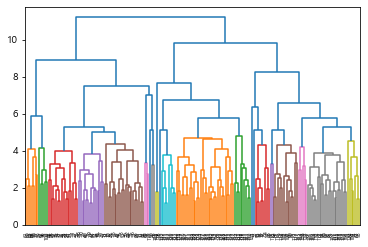

In [11]:
_ = dendrogram(linkage_matrix, color_threshold=5)

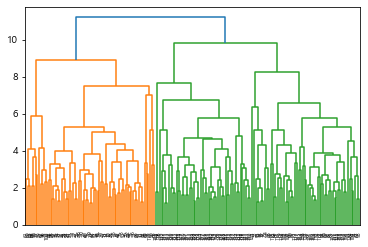

In [12]:
_ = dendrogram(linkage_matrix, color_threshold=10)

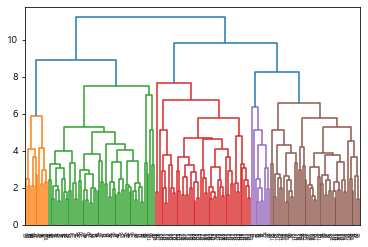

In [13]:
_ = dendrogram(linkage_matrix, color_threshold=8)

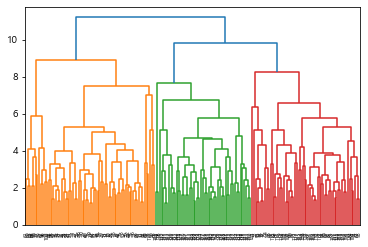

In [14]:
_ = dendrogram(linkage_matrix, color_threshold=9)

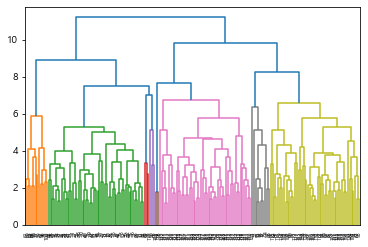

In [15]:
_ = dendrogram(linkage_matrix, color_threshold=7)

## linkage 거리 산출방법 변경

# 정답

In [16]:
y = pd.DataFrame(wine['Type'])
y[y['Type'] == 'A'] = 0
y[y['Type'] == 'B'] = 1
y[y['Type'] == 'C'] = 2

In [17]:
y=y['Type']

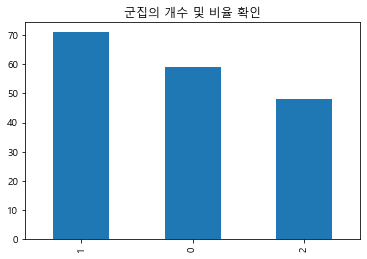

In [18]:
pd.value_counts(y).plot(kind='bar' , title = '군집의 개수 및 비율 확인')
plt.show()

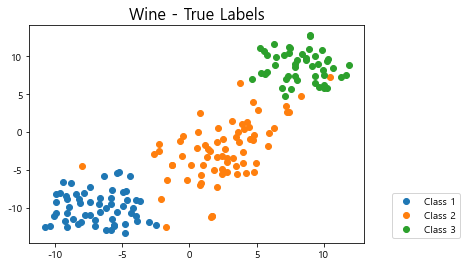

In [21]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA 
X_ = TSNE(n_components=2).fit_transform(X)
plt.title('Wine - True Labels', fontsize=16)
for c in np.unique(y):
    plt.scatter(X_[y == c,0], X_[y == c,1], label='Class {}'.format(c+1))
plt.legend(loc=4, bbox_to_anchor=(1.3, 0.0))

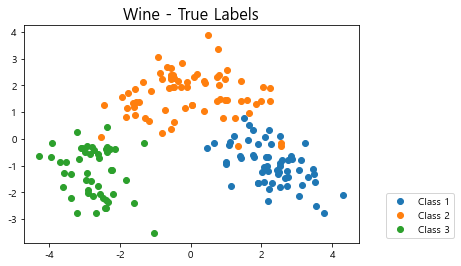

In [22]:
X_2 = PCA(n_components=2).fit_transform(X)
plt.title('Wine - True Labels', fontsize=16)
for c in np.unique(y):
    plt.scatter(X_2[y == c,0], X_2[y == c,1], label='Class {}'.format(c+1))
plt.legend(loc=4, bbox_to_anchor=(1.3, 0.0))

ACC등 cluster 결과를 잘 1,2,3 label주면 가능은 할듯

In [23]:
model = AgglomerativeClustering(
    linkage = 'complete',
    affinity = 'euclidean',
    distance_threshold=None,
    n_clusters=3)

linkage_list = ['single', 'complete', 'average', 'ward']
cluster_results = {}
for _linkage in linkage_list:
    model.linkage = _linkage
    _results = model.fit_predict(X)
    cluster_results[_linkage] = _results


In [24]:
from sklearn.manifold import TSNE
X_ = TSNE(n_components=2).fit_transform(X)

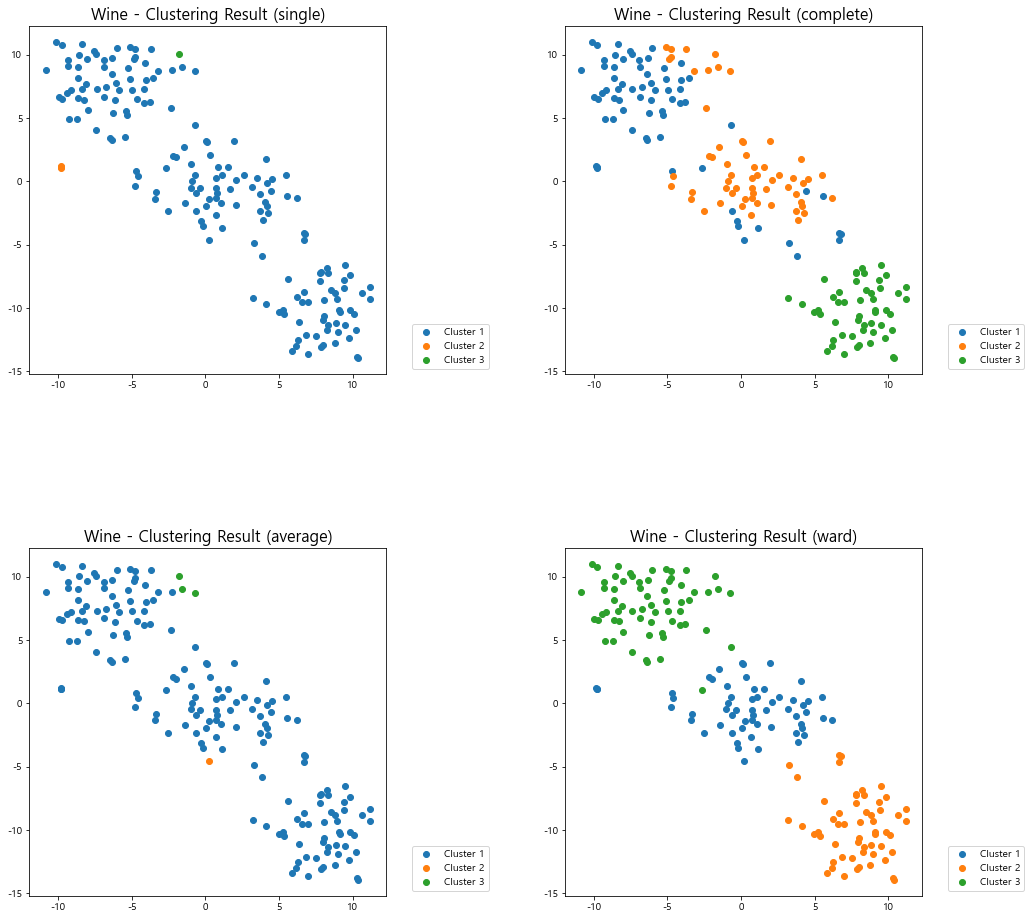

In [25]:
plt.figure(figsize=(16, 16))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i, _linkage in enumerate(linkage_list):
    plt.subplot(2, 2, i+1)
    plt.title('Wine - Clustering Result ({})'.format(_linkage), fontsize=16)
    _results = cluster_results[_linkage]
    for c in np.unique(_results):
        plt.scatter(X_[_results == c,0], X_[_results == c,1], label='Cluster {}'.format(c+1))
    plt.legend(loc=4, bbox_to_anchor=(1.3, 0.0))
plt.show()

In [26]:
from sklearn.decomposition import PCA 
X_ = PCA(n_components=2).fit_transform(X)

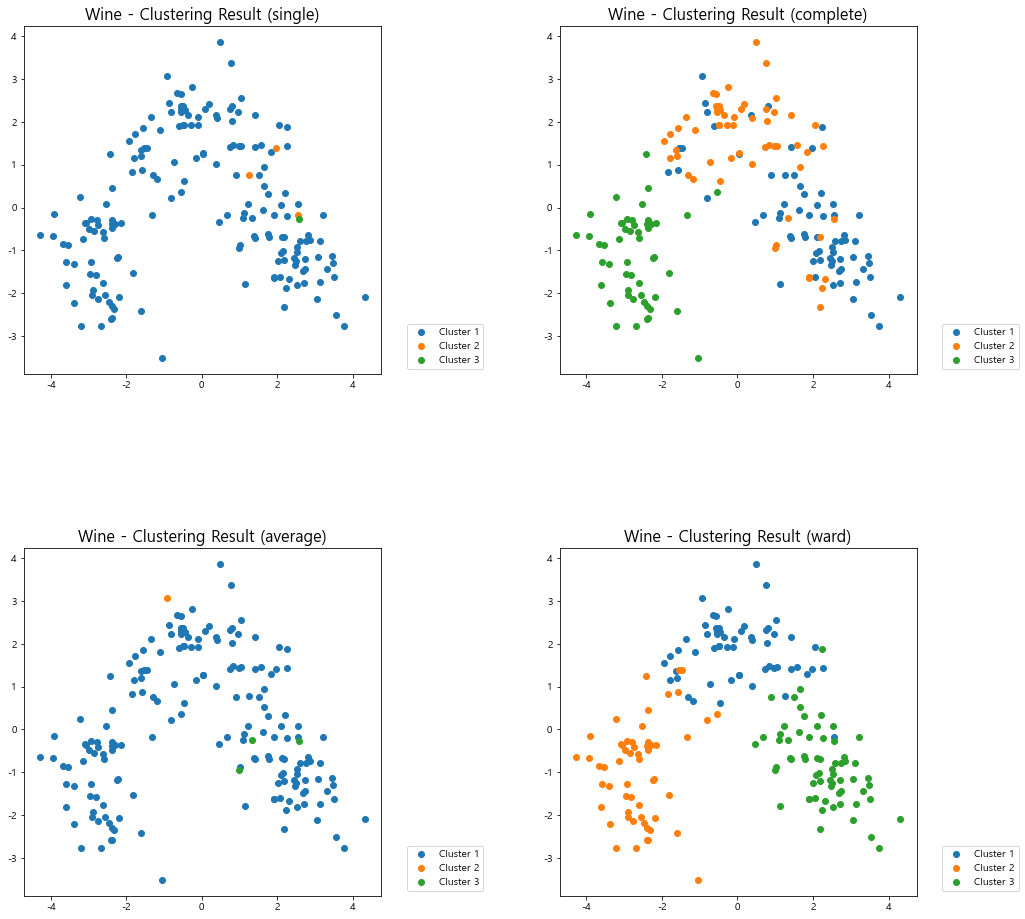

In [27]:
plt.figure(figsize=(16, 16))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i, _linkage in enumerate(linkage_list):
    plt.subplot(2, 2, i+1)
    plt.title('Wine - Clustering Result ({})'.format(_linkage), fontsize=16)
    _results = cluster_results[_linkage]
    for c in np.unique(_results):
        plt.scatter(X_[_results == c,0], X_[_results == c,1], label='Cluster {}'.format(c+1))
    plt.legend(loc=4, bbox_to_anchor=(1.3, 0.0))
plt.show()

## 거리종류 변경

In [28]:
model = AgglomerativeClustering(
    linkage = 'complete',  #여기를 위의 결과중 나은것을 대입하는걸로
    affinity = 'euclidean',
    distance_threshold=None,
    n_clusters=3)

distance_list = ['euclidean', 'manhattan','cosine']
cluster_results = {}
for _distance in distance_list:
    model.affinity = _distance
    _results = model.fit_predict(X)
    cluster_results[_distance] = _results

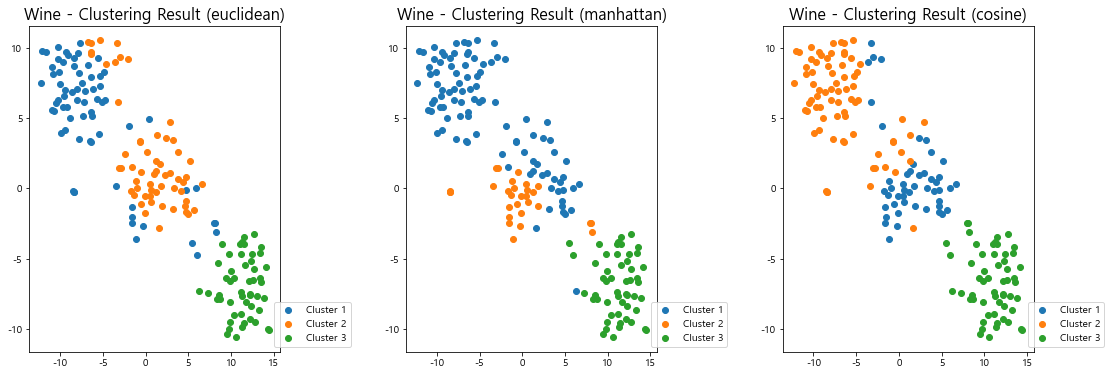

In [29]:
X_ = TSNE(n_components=2).fit_transform(X)

plt.figure(figsize=(18, 6))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i, _distance in enumerate(distance_list):
    plt.subplot(1, 3, i+1)
    plt.title('Wine - Clustering Result ({})'.format(_distance), fontsize=16)
    _results = cluster_results[_distance]
    for c in np.unique(_results):
        plt.scatter(X_[_results == c,0], X_[_results == c,1], label='Cluster {}'.format(c+1))
    plt.legend(loc=4, bbox_to_anchor=(1.3, 0.0))

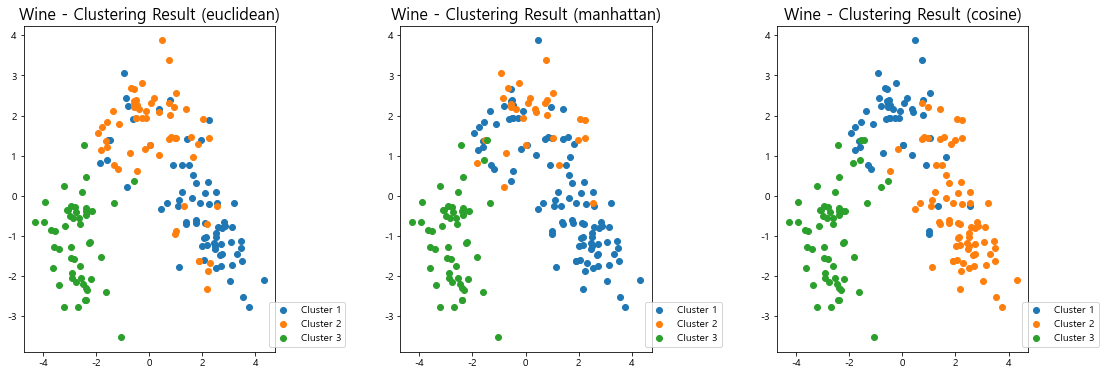

In [30]:
X_ = PCA(n_components=2).fit_transform(X)

plt.figure(figsize=(18, 6))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i, _distance in enumerate(distance_list):
    plt.subplot(1, 3, i+1)
    plt.title('Wine - Clustering Result ({})'.format(_distance), fontsize=16)
    _results = cluster_results[_distance]
    for c in np.unique(_results):
        plt.scatter(X_[_results == c,0], X_[_results == c,1], label='Cluster {}'.format(c+1))
    plt.legend(loc=4, bbox_to_anchor=(1.3, 0.0))

# K-means

## K변경

### k여러개 동시에 - random seed 고정

In [32]:
model = KMeans(
    n_clusters = 3,
    init = 'k-means++',
    n_init = 1, 
    random_state = 42)

cluster_results = {}
for _n_clusters in np.arange(2, 14):
    model.n_clusters = _n_clusters
    cluster_results[_n_clusters] = model.fit_predict(X)

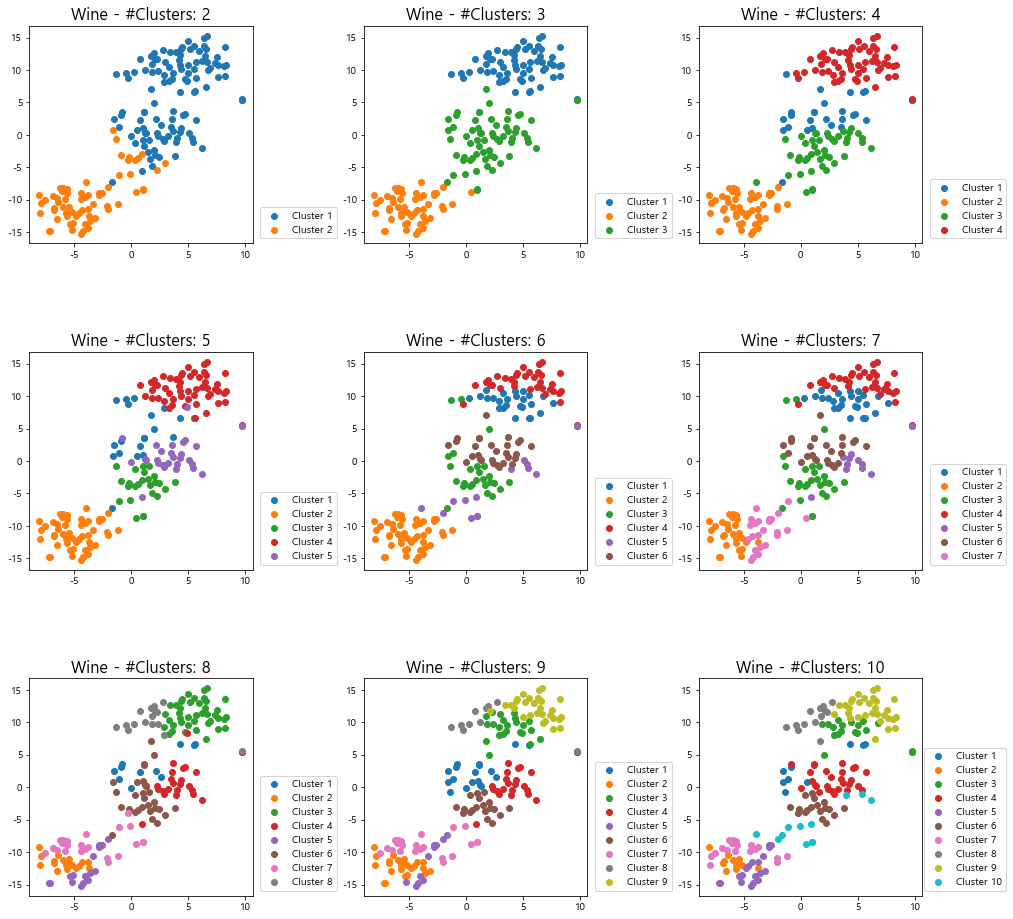

In [34]:
X_ = TSNE(n_components=2).fit_transform(X)
plt.figure(figsize=(16, 16))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i, _n_clusters in enumerate(np.arange(2, 11)):
    plt.subplot(3, 3, i+1)
    plt.title('Wine - #Clusters: {}'.format(_n_clusters), fontsize=16)
    _results = cluster_results[_n_clusters]
    for c in np.unique(_results):
        plt.scatter(X_[_results == c,0], X_[_results == c,1], label='Cluster {}'.format(c+1))
    plt.legend(loc=4, bbox_to_anchor=(1.4, 0.0))

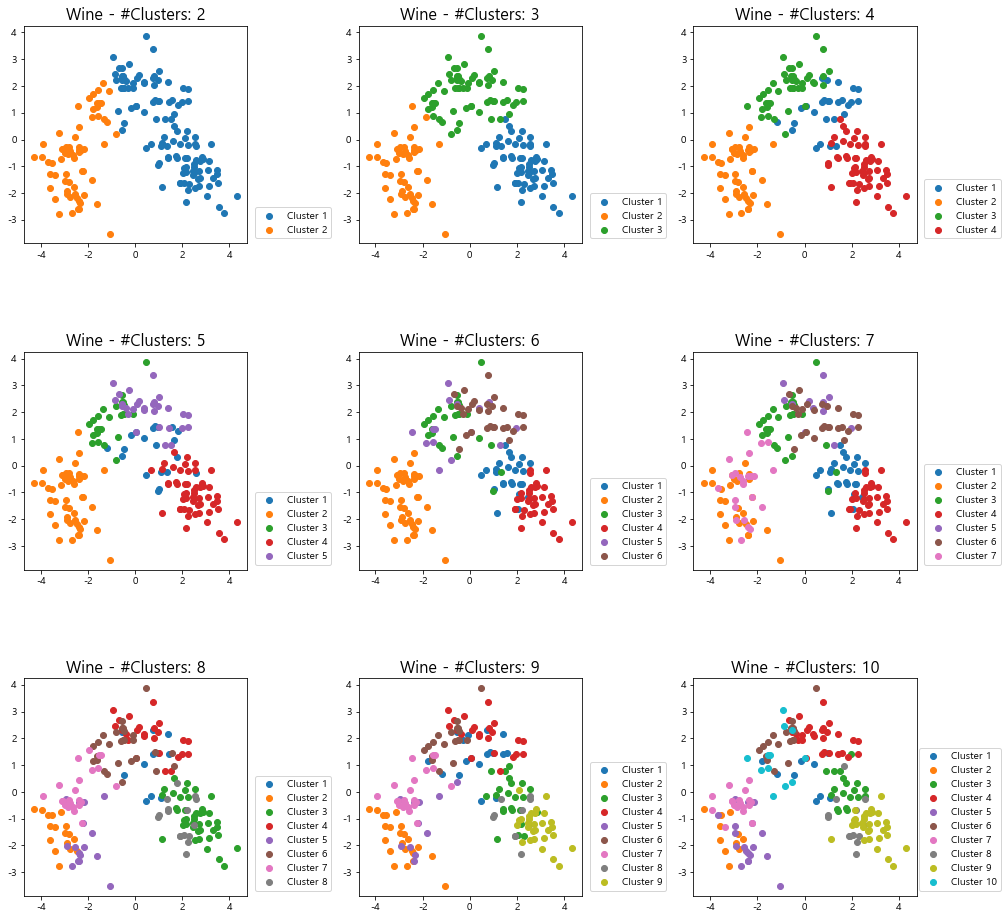

In [36]:
X_ = PCA(n_components=2).fit_transform(X)
plt.figure(figsize=(16, 16))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i, _n_clusters in enumerate(np.arange(2, 11)):
    plt.subplot(3, 3, i+1)
    plt.title('Wine - #Clusters: {}'.format(_n_clusters), fontsize=16)
    _results = cluster_results[_n_clusters]
    for c in np.unique(_results):
        plt.scatter(X_[_results == c,0], X_[_results == c,1], label='Cluster {}'.format(c+1))
    plt.legend(loc=4, bbox_to_anchor=(1.4, 0.0))

### k여러개 각자 - random seed 함께

In [82]:
#k=2
# 모델 정의 
model = KMeans(
    n_clusters = 3,
    init = 'random',
    n_init = 1)

random_seeds = np.arange(100, 160, 10)
cluster_results = {}
# 학습
for _seed in random_seeds:
    model.random_state = _seed
    _results = model.fit_predict(X)
    cluster_results[_seed] = _results

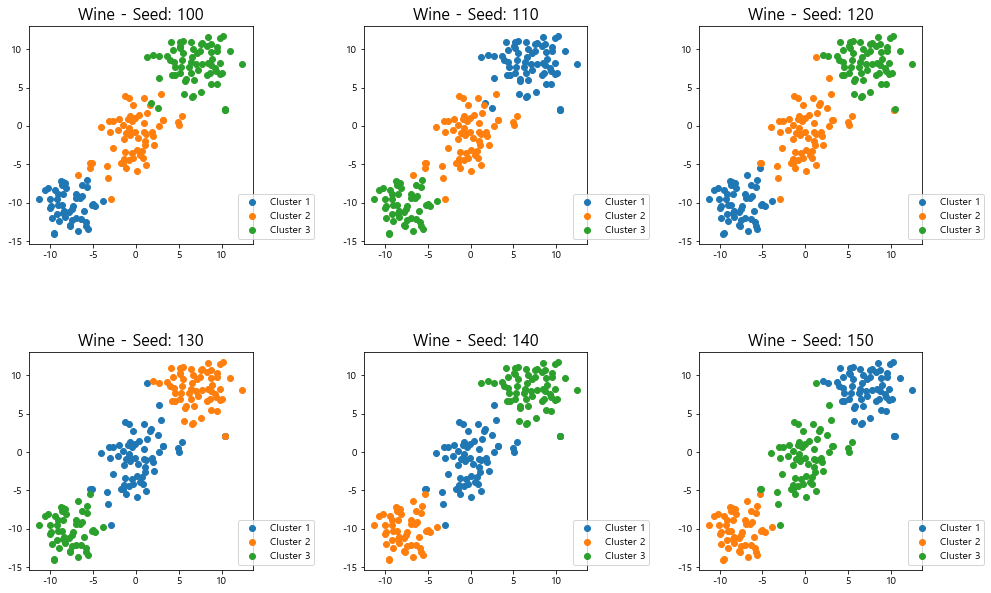

In [83]:
# 군집 형성 시각화
X_ = TSNE(n_components=2).fit_transform(X)
plt.figure(figsize=(16, 16))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i, _seed in enumerate(random_seeds):
    plt.subplot(3, 3, i+1)
    plt.title('Wine - Seed: {}'.format(_seed), fontsize=16)
    _results = cluster_results[_seed]
    for c in np.unique(_results):
        plt.scatter(X_[_results == c,0], X_[_results == c,1], label='Cluster {}'.format(c+1))
    plt.legend(loc=4, bbox_to_anchor=(1.3, 0.0))

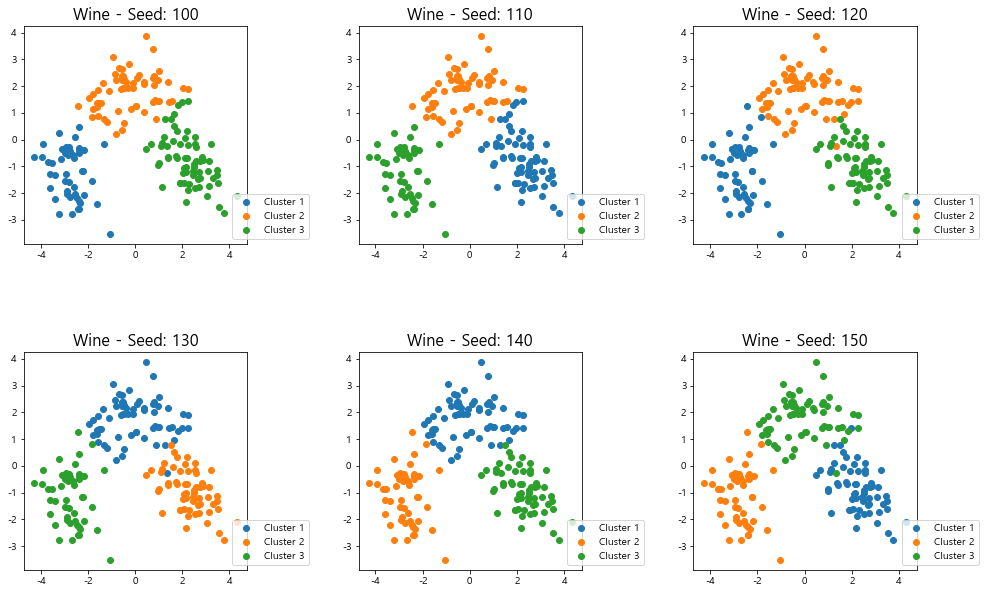

In [84]:
X_ = PCA(n_components=2).fit_transform(X)
plt.figure(figsize=(16, 16))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i, _seed in enumerate(random_seeds):
    plt.subplot(3, 3, i+1)
    plt.title('Wine - Seed: {}'.format(_seed), fontsize=16)
    _results = cluster_results[_seed]
    for c in np.unique(_results):
        plt.scatter(X_[_results == c,0], X_[_results == c,1], label='Cluster {}'.format(c+1))
    plt.legend(loc=4, bbox_to_anchor=(1.3, 0.0))

In [43]:
#k=10
# 모델 정의 
model = KMeans(
    n_clusters = 5,
    init = 'random',
    n_init = 1)

random_seeds = np.arange(100, 160, 10)
cluster_results = {}
# 학습
for _seed in random_seeds:
    model.random_state = _seed
    _results = model.fit_predict(X)
    cluster_results[_seed] = _results

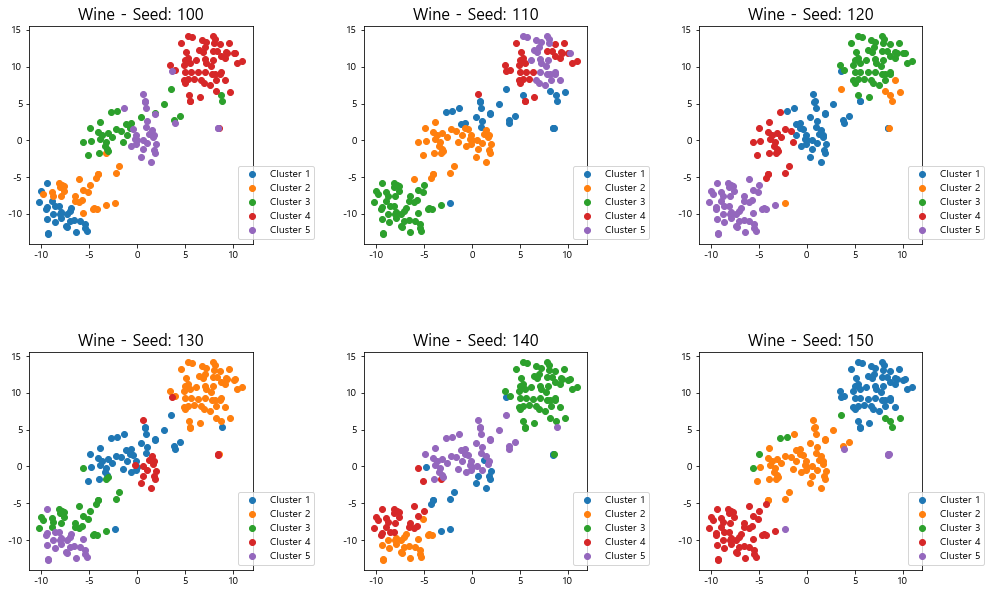

In [44]:
# 군집 형성 시각화
X_ = TSNE(n_components=2).fit_transform(X)
plt.figure(figsize=(16, 16))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i, _seed in enumerate(random_seeds):
    plt.subplot(3, 3, i+1)
    plt.title('Wine - Seed: {}'.format(_seed), fontsize=16)
    _results = cluster_results[_seed]
    for c in np.unique(_results):
        plt.scatter(X_[_results == c,0], X_[_results == c,1], label='Cluster {}'.format(c+1))
    plt.legend(loc=4, bbox_to_anchor=(1.3, 0.0))

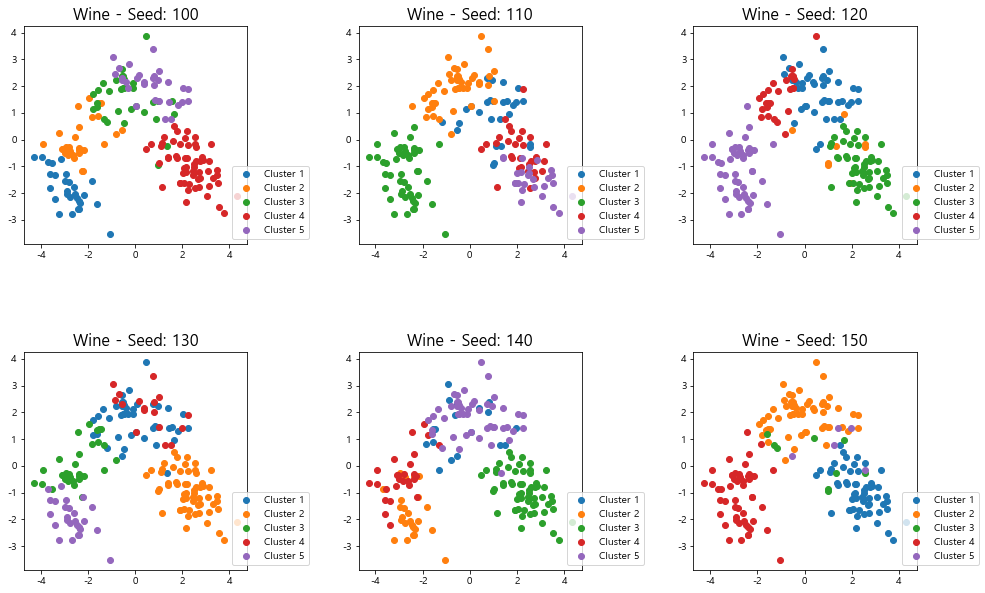

In [45]:
X_ = PCA(n_components=2).fit_transform(X)
plt.figure(figsize=(16, 16))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i, _seed in enumerate(random_seeds):
    plt.subplot(3, 3, i+1)
    plt.title('Wine - Seed: {}'.format(_seed), fontsize=16)
    _results = cluster_results[_seed]
    for c in np.unique(_results):
        plt.scatter(X_[_results == c,0], X_[_results == c,1], label='Cluster {}'.format(c+1))
    plt.legend(loc=4, bbox_to_anchor=(1.3, 0.0))

## n_init 증가 확인 + with random seeds

In [48]:
#n_init = 3
model = KMeans(
    n_clusters = 3,
    init = 'random',
    n_init = 3)

random_seeds = np.arange(100, 160, 10)
cluster_results = {}
# 학습
for _seed in random_seeds:
    model.random_state = _seed
    _results = model.fit_predict(X)
    cluster_results[_seed] = _results

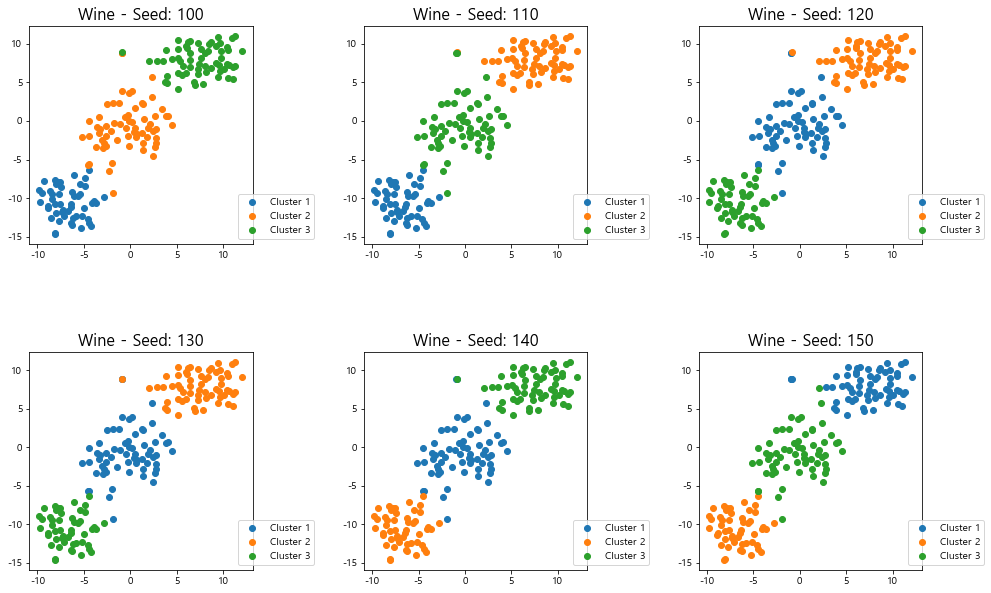

In [49]:
# 군집 형성 시각화
X_ = TSNE(n_components=2).fit_transform(X)
plt.figure(figsize=(16, 16))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i, _seed in enumerate(random_seeds):
    plt.subplot(3, 3, i+1)
    plt.title('Wine - Seed: {}'.format(_seed), fontsize=16)
    _results = cluster_results[_seed]
    for c in np.unique(_results):
        plt.scatter(X_[_results == c,0], X_[_results == c,1], label='Cluster {}'.format(c+1))
    plt.legend(loc=4, bbox_to_anchor=(1.3, 0.0))

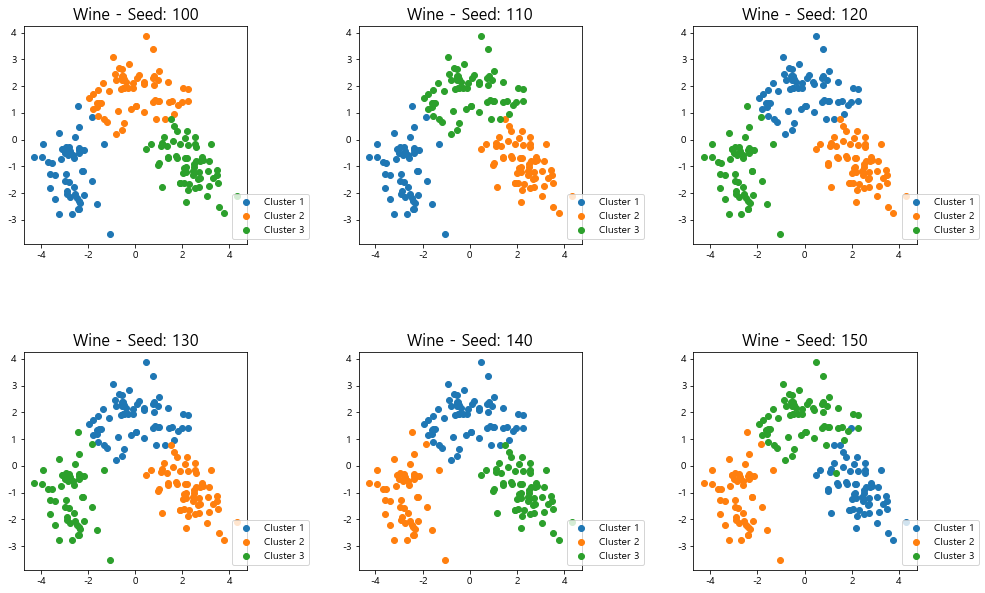

In [50]:
X_ = PCA(n_components=2).fit_transform(X)
plt.figure(figsize=(16, 16))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i, _seed in enumerate(random_seeds):
    plt.subplot(3, 3, i+1)
    plt.title('Wine - Seed: {}'.format(_seed), fontsize=16)
    _results = cluster_results[_seed]
    for c in np.unique(_results):
        plt.scatter(X_[_results == c,0], X_[_results == c,1], label='Cluster {}'.format(c+1))
    plt.legend(loc=4, bbox_to_anchor=(1.3, 0.0))

In [51]:
#n_init = 10
model = KMeans(
    n_clusters = 3,
    init = 'random',
    n_init = 10)

random_seeds = np.arange(100, 160, 10)
cluster_results = {}
# 학습
for _seed in random_seeds:
    model.random_state = _seed
    _results = model.fit_predict(X)
    cluster_results[_seed] = _results

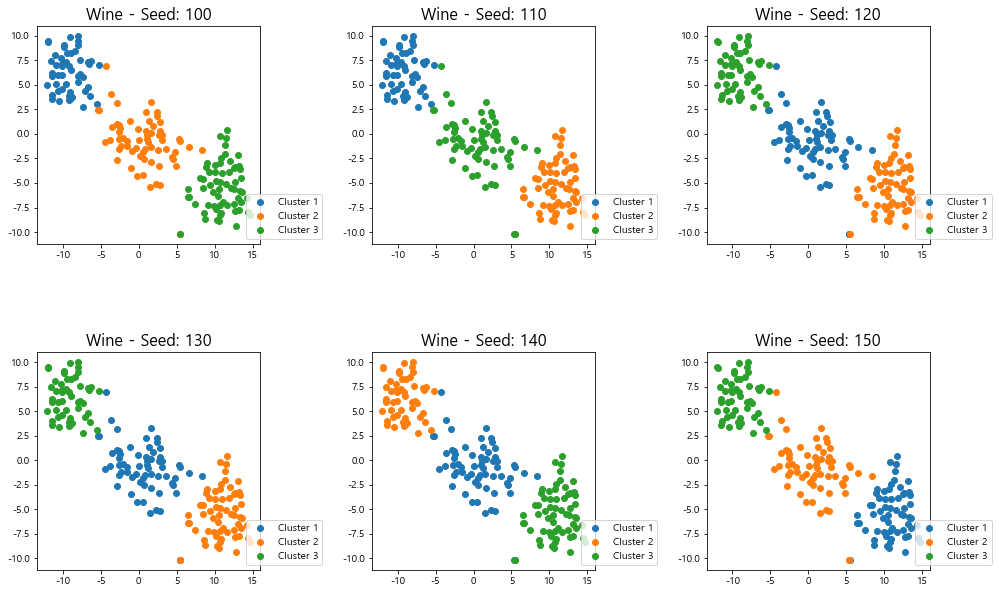

In [53]:
# 군집 형성 시각화
X_ = TSNE(n_components=2).fit_transform(X)
plt.figure(figsize=(16, 16))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i, _seed in enumerate(random_seeds):
    plt.subplot(3, 3, i+1)
    plt.title('Wine - Seed: {}'.format(_seed), fontsize=16)
    _results = cluster_results[_seed]
    for c in np.unique(_results):
        plt.scatter(X_[_results == c,0], X_[_results == c,1], label='Cluster {}'.format(c+1))
    plt.legend(loc=4, bbox_to_anchor=(1.3, 0.0))

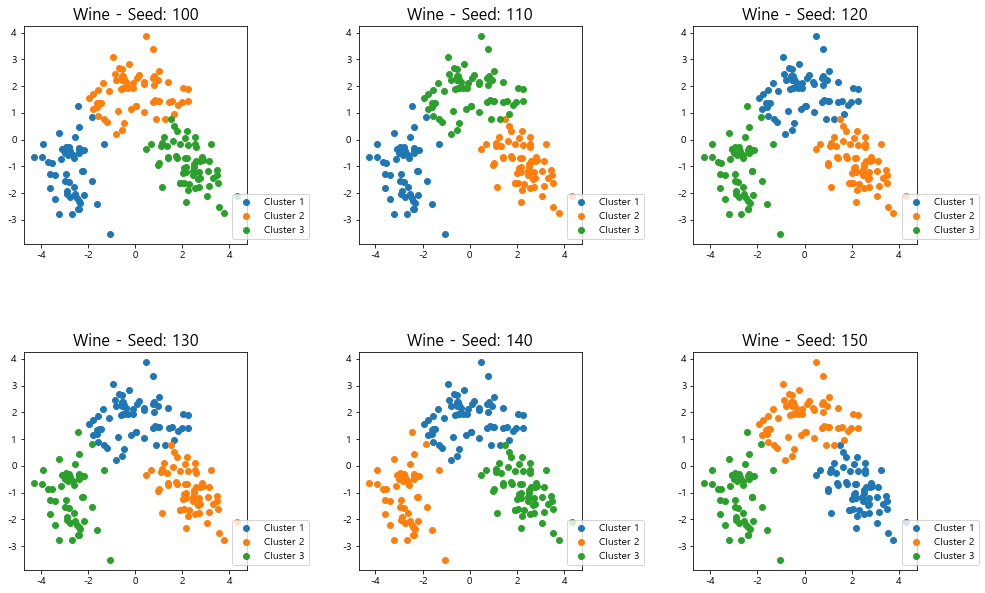

In [54]:
X_ = PCA(n_components=2).fit_transform(X)
plt.figure(figsize=(16, 16))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i, _seed in enumerate(random_seeds):
    plt.subplot(3, 3, i+1)
    plt.title('Wine - Seed: {}'.format(_seed), fontsize=16)
    _results = cluster_results[_seed]
    for c in np.unique(_results):
        plt.scatter(X_[_results == c,0], X_[_results == c,1], label='Cluster {}'.format(c+1))
    plt.legend(loc=4, bbox_to_anchor=(1.3, 0.0))

## init변경 k-mean++

In [55]:
#n_init = 10
model = KMeans(
    n_clusters = 3,
    init = 'k-means++',
    n_init = 1)

random_seeds = np.arange(100, 160, 10)
cluster_results = {}
# 학습
for _seed in random_seeds:
    model.random_state = _seed
    _results = model.fit_predict(X)
    cluster_results[_seed] = _results

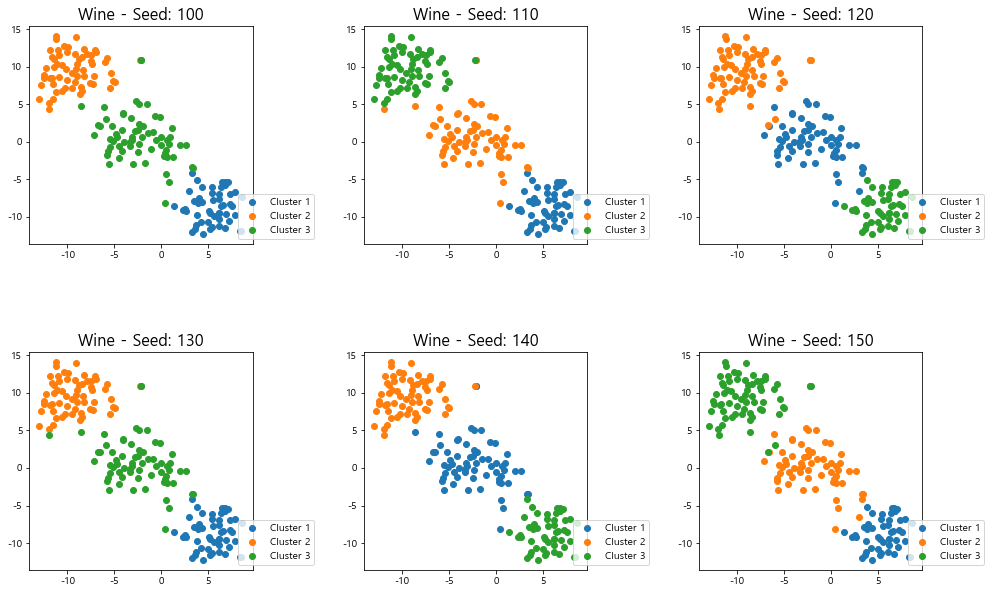

In [57]:
# 군집 형성 시각화
X_ = TSNE(n_components=2).fit_transform(X)
plt.figure(figsize=(16, 16))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i, _seed in enumerate(random_seeds):
    plt.subplot(3, 3, i+1)
    plt.title('Wine - Seed: {}'.format(_seed), fontsize=16)
    _results = cluster_results[_seed]
    for c in np.unique(_results):
        plt.scatter(X_[_results == c,0], X_[_results == c,1], label='Cluster {}'.format(c+1))
    plt.legend(loc=4, bbox_to_anchor=(1.3, 0.0))

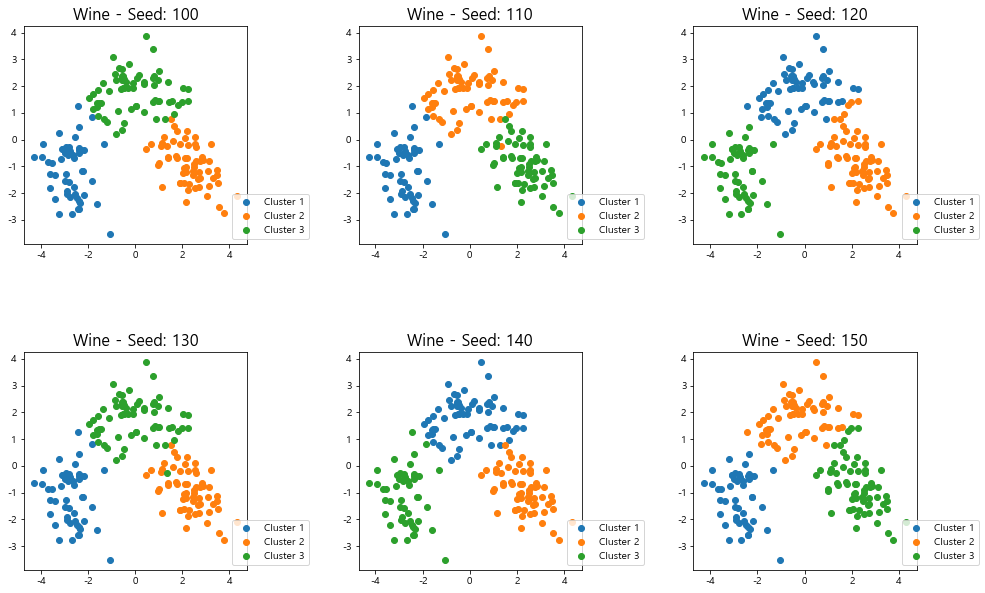

In [58]:
X_ = PCA(n_components=2).fit_transform(X)
plt.figure(figsize=(16, 16))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i, _seed in enumerate(random_seeds):
    plt.subplot(3, 3, i+1)
    plt.title('Wine - Seed: {}'.format(_seed), fontsize=16)
    _results = cluster_results[_seed]
    for c in np.unique(_results):
        plt.scatter(X_[_results == c,0], X_[_results == c,1], label='Cluster {}'.format(c+1))
    plt.legend(loc=4, bbox_to_anchor=(1.3, 0.0))

# 데이터의 실제 Y값과 cluster비교해보기

In [59]:
# 모델 정의 
model = KMeans(
    n_clusters = 3,
    init = 'k-means++',
    n_init = 10,
    random_state = 0)

# 학습
opti_clusters = model.fit_predict(X)

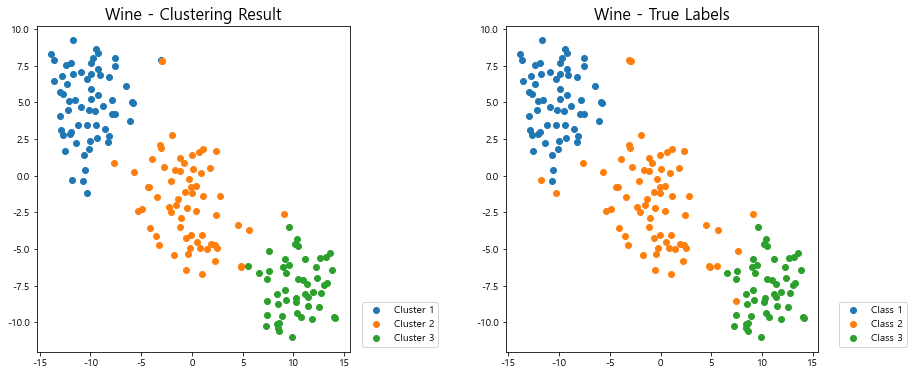

In [60]:
X_ = TSNE(n_components=2).fit_transform(X)

# 군집 형성 시각화
plt.figure(figsize=(14, 6))
plt.subplots_adjust(wspace=0.5)

plt.subplot(1, 2, 1)
plt.title('Wine - Clustering Result', fontsize=16)
for c in np.unique(opti_clusters):
    plt.scatter(X_[opti_clusters == c,0], X_[opti_clusters == c,1], label='Cluster {}'.format(c+1))
plt.legend(loc=4, bbox_to_anchor=(1.3, 0.0))

plt.subplot(1, 2, 2)
plt.title('Wine - True Labels', fontsize=16)
for c in np.unique(y):
    plt.scatter(X_[y == c,0], X_[y == c,1], label='Class {}'.format(c+1))
plt.legend(loc=4, bbox_to_anchor=(1.3, 0.0))

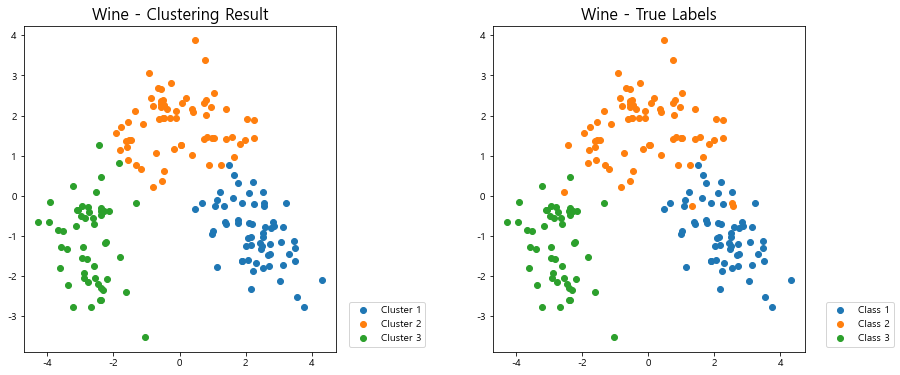

In [61]:
X_ = PCA(n_components=2).fit_transform(X)

# 군집 형성 시각화
plt.figure(figsize=(14, 6))
plt.subplots_adjust(wspace=0.5)

plt.subplot(1, 2, 1)
plt.title('Wine - Clustering Result', fontsize=16)
for c in np.unique(opti_clusters):
    plt.scatter(X_[opti_clusters == c,0], X_[opti_clusters == c,1], label='Cluster {}'.format(c+1))
plt.legend(loc=4, bbox_to_anchor=(1.3, 0.0))

plt.subplot(1, 2, 2)
plt.title('Wine - True Labels', fontsize=16)
for c in np.unique(y):
    plt.scatter(X_[y == c,0], X_[y == c,1], label='Class {}'.format(c+1))
plt.legend(loc=4, bbox_to_anchor=(1.3, 0.0))

In [62]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [63]:
y

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: Type, Length: 178, dtype: object

In [64]:
Y=opti_clusters.reshape(1,-178)
Y

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2]])

In [65]:
Y[0][0]

0

In [66]:
yy=[]
for i in range(len(Y[0])):
    yy.append(Y[0][i])
yy

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [67]:
count=0
for i in range(len(y)):
    if y[i]==yy[i]:
        count=count+1
    
count

172

In [68]:
yy[1]

0

In [69]:
acc = count/len(y)

In [70]:
acc

0.9662921348314607

# silhourtte 실루렛 기법

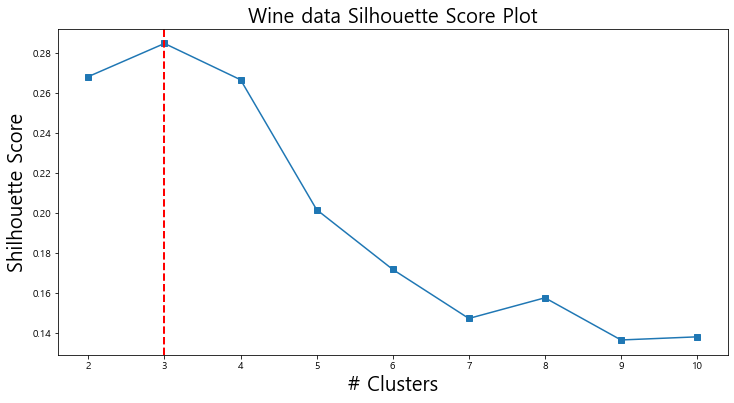

최고의 K: 3


In [77]:
model = KMeans(
    n_clusters = 3,
    init = 'k-means++',
    n_init = 3, 
    random_state = 0)

scores = []
k_list=list(range(2,11))
cluster_results = {}
for _n_clusters in np.arange(2, 11):
    model.n_clusters = _n_clusters
    cluster_results[_n_clusters] = model.fit_predict(X)
    scores.append(silhouette_score(X, model.labels_))

best_k = [k_list[i] for i in range(len(k_list)) if scores[i] == np.max(scores)]
plt.figure(figsize=(12, 6))
plt.title('Wine data Silhouette Score Plot', fontsize=20)
plt.xlabel('# Clusters', fontsize=20)
plt.ylabel('Shilhouette Score', fontsize=20)
plt.plot(np.arange(2, 11), scores, marker='s')

plt.axvline(best_k[0], color='r', linestyle='--', linewidth=2)
plt.show()

print(f'최고의 K: {best_k[0]}')

In [78]:
for key in cluster_results:
    key

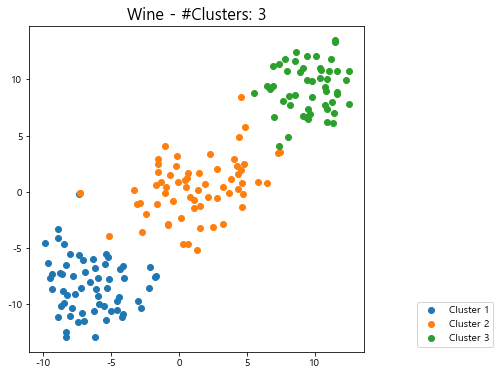

In [79]:
X_ = TSNE(n_components=2).fit_transform(X)
plt.figure(figsize=(6, 6))
plt.title('Wine - #Clusters: {}'.format(3), fontsize=16)
_results = cluster_results[3] #여기를 조작해
for c in np.unique(_results):
    plt.scatter(X_[_results == c,0], X_[_results == c,1], label='Cluster {}'.format(c+1))
plt.legend(loc=4, bbox_to_anchor=(1.4, 0.0))
plt.show()

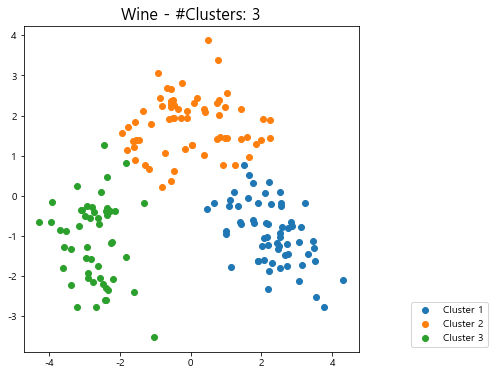

In [80]:
X_ = PCA(n_components=2).fit_transform(X)
plt.figure(figsize=(6, 6))
plt.title('Wine - #Clusters: {}'.format(3), fontsize=16)
_results = cluster_results[3] #여기를 조작해
for c in np.unique(_results):
    plt.scatter(X_[_results == c,0], X_[_results == c,1], label='Cluster {}'.format(c+1))
plt.legend(loc=4, bbox_to_anchor=(1.4, 0.0))
plt.show()